## Import Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import FuncFormatter

In [2]:
# import data 

hotel = pd.read_excel('merge data tahun 2016-2018.xlsx', sheet_name = 'Sheet1')
hotel.head()

,nama_usaha,jenis_hotel,jumlah_kamar,wilayah,harga_harian
0,PENINSULA HOTEL,Bintang 1,90,Jakarta Barat,371000
1,PURI MEGA,Bintang 1,125,Jakarta Pusat,216080
2,MIRAH,Bintang 1,61,Jakarta Pusat,186514
3,BANYUWANGI SINTERA,Bintang 1,60,Jakarta Pusat,285338
4,HOTEL PURI JAYA,Bintang 1,135,Jakarta Pusat,199430


In [3]:
# cek tipe data

hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nama_usaha    116 non-null    object
 1   jenis_hotel   116 non-null    object
 2   jumlah_kamar  116 non-null    int64 
 3   wilayah       116 non-null    object
 4   harga_harian  116 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.7+ KB


### Count Plot untuk Visualisasi Hotel di Setiap Lokasi

In [4]:
sns.set_style('whitegrid')

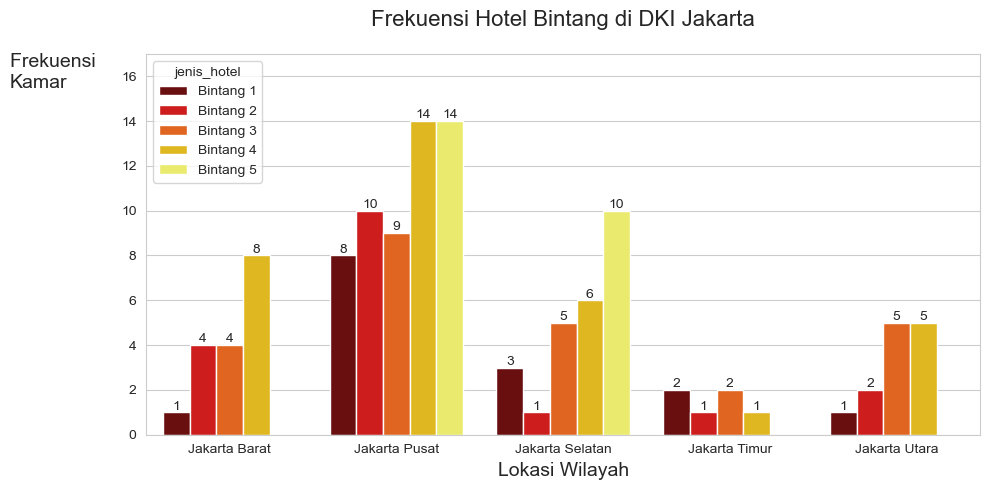

In [5]:
# set figure size
plt.figure(figsize=(10,5), dpi = 100) 

# set title
plt.title("Frekuensi Hotel Bintang di DKI Jakarta", size = 16, pad = 20)

# count plot
cplot = sns.countplot(x = 'wilayah', hue = 'jenis_hotel', 
              data = hotel, palette = 'hot')

# set y limit
plt.ylim(0, 17)

# annotations
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha = 'center', 
                   xytext = (0,2), 
                   textcoords = 'offset points')

# set axes labels 
plt.xlabel("Lokasi Wilayah", size = 14)
plt.ylabel("Frekuensi \nKamar", size = 14, rotation = 0, 
          position = (-.1, .90), ha = 'left',
          labelpad = 80)

plt.tight_layout();

# plt.savefig('frekuensi hotel bintang di DKI Jakarta.png')

### Bar Plot untuk Rata-rata Jumlah Kamar Hotel Bintang di DKI Jakarta

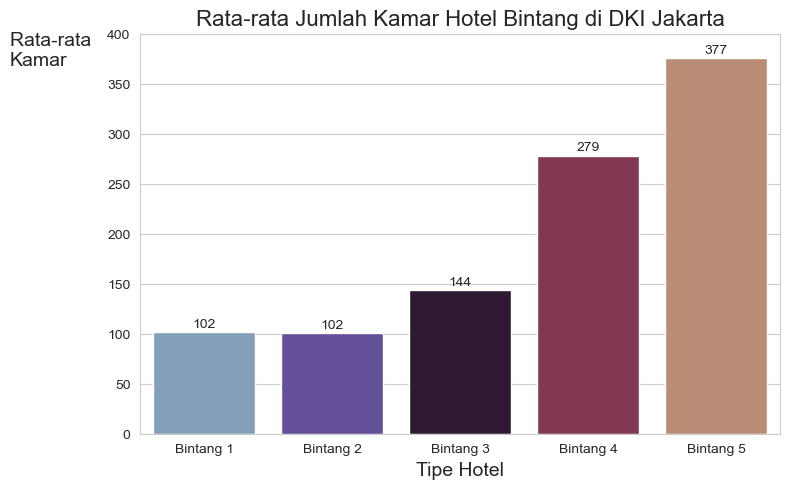

In [6]:
# set figure size
plt.figure(figsize=(8,5), dpi = 100) 

# set title
plt.title("Rata-rata Jumlah Kamar Hotel Bintang di DKI Jakarta", size = 16)

# bar plot
bplot = sns.barplot(x = 'jenis_hotel', y = 'jumlah_kamar',
                    data = hotel, ci = None, estimator = np.mean, 
                   palette = 'twilight')
# set y limit 
plt.ylim(0, 400)

# annotations
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width()/2, p.get_height()),
                  ha = 'center', xytext = (0,3), 
                  textcoords = 'offset points')

# set axes labels
plt.xlabel("Tipe Hotel", size = 14)
plt.ylabel("Rata-rata \nKamar", size = 14, rotation = 0, 
          position = (-.1, .91), ha = 'left',
          labelpad = 70)

plt.tight_layout();

# plt.savefig('Rata-rata Kamar Hotel di DKI JKT.png')

### Harga Harian Kamar Hotel per Wilayah dan Golongan di DKI Jakarta

In [7]:
hotelpivot = hotel.pivot_table(values = 'harga_harian', index = 'wilayah', 
                                columns = 'jenis_hotel', aggfunc = 'mean', fill_value = 0)
hotelpivot

jenis_hotel,Bintang 1,Bintang 2,Bintang 3,Bintang 4,Bintang 5
wilayah,,,,,
Jakarta Barat,371000.00,264000.0,390939.000000,562963.625000,0.000000e+00
Jakarta Pusat,226519.75,231263.7,365269.777778,835179.000000,1.411651e+06
Jakarta Selatan,293724.00,420000.0,375299.000000,583199.166667,1.362057e+06
Jakarta Timur,278000.00,384679.0,610000.000000,450000.000000,0.000000e+00
Jakarta Utara,338000.00,383216.0,467185.000000,481065.400000,0.000000e+00


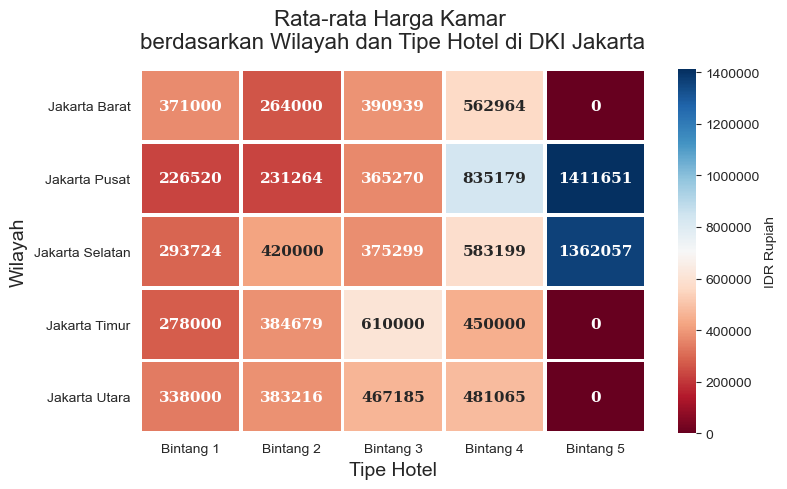

In [9]:
# set figure size
plt.figure(figsize = (8,5), dpi = 100)

# set title
plt.title('Rata-rata Harga Kamar \nberdasarkan Wilayah dan Tipe Hotel di DKI Jakarta', size = 16, pad = 15)

# heatmap
sns.heatmap(hotelpivot, 
            cmap = 'RdBu',
            annot = True, 
            linewidth = 2,
            fmt = ".0f", annot_kws = {
                'fontsize': 11, 
                'fontweight': 'bold', 
                'fontfamily': 'serif'
            }, cbar_kws = {
                'format': '%d', 
                'label': 'IDR Rupiah'
            })

# set axes labels
plt.xlabel('Tipe Hotel', size = 14)
plt.ylabel('Wilayah', size = 14)

plt.tight_layout();

# plt.savefig('Heatmap rata-rata harga kamar.png')

## Boxplot Sebaran Harga Kamar Hotel di DKI Jakarta

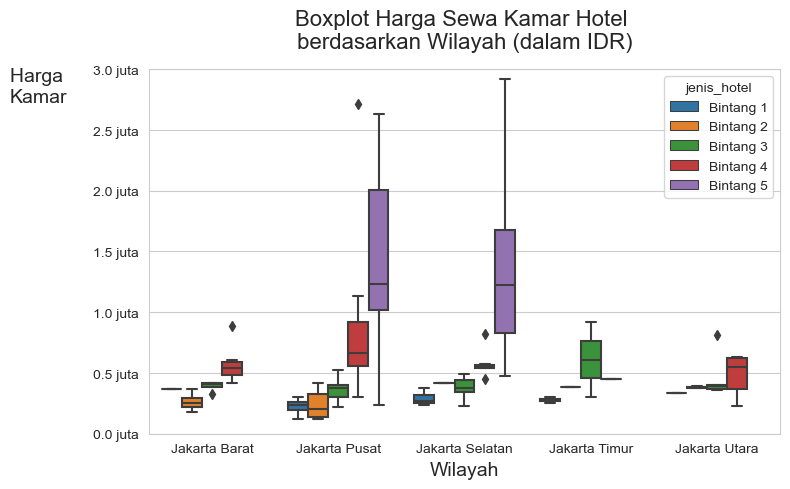

In [37]:
# set figure size
plt.figure(figsize = (8,5), dpi = 100)

# set title
plt.title('Boxplot Harga Sewa Kamar Hotel \nberdasarkan Wilayah (dalam IDR)', size = 16, pad = 15)

# boxplot 
sns.boxplot(x = 'wilayah', y = 'harga_harian', hue = 'jenis_hotel', data = hotel)

# set y limit 
plt.ylim(0, 3000000)

# set tick labels 
ax = plt.gca()
g = ax.get_yticks()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: format(str(x/1000000))+' juta'))


# set axes labels
plt.xlabel('Wilayah', size = 14)
plt.ylabel('Harga \nKamar', size = 14, rotation = 0, 
          position = (-.1, .9), ha = 'left',
          labelpad = 60)


plt.tight_layout();

# plt.savefig('Boxplot sebaran harga kamar.png')

### Bar Plot Harga Hotel per Harian di DKI Jakarta

In [18]:
# import data 

hotels = pd.read_excel('merge data tahun 2016-2018.xlsx', sheet_name = 'Sheet2')

In [19]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   jenis_hotel         180 non-null    object 
 1   tahun               180 non-null    int64  
 2   bulan               180 non-null    int64  
 3   Okupansi            180 non-null    float64
 4   jumlah_kamar        180 non-null    int64  
 5   harga               180 non-null    int64  
 6   rating              180 non-null    float64
 7   ac                  180 non-null    int64  
 8   restaurant          180 non-null    float64
 9   parkir              180 non-null    int64  
 10  wifi                180 non-null    float64
 11  kolam renang        180 non-null    float64
 12  Tingkat Pendapatan  180 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 18.4+ KB


In [20]:
hotelsnew = hotels.astype({'tahun': 'object', 'bulan': 'object'})

In [21]:
hotelsnew.dtypes

jenis_hotel            object
tahun                  object
bulan                  object
Okupansi              float64
jumlah_kamar            int64
harga                   int64
rating                float64
ac                      int64
restaurant            float64
parkir                  int64
wifi                  float64
kolam renang          float64
Tingkat Pendapatan    float64
dtype: object

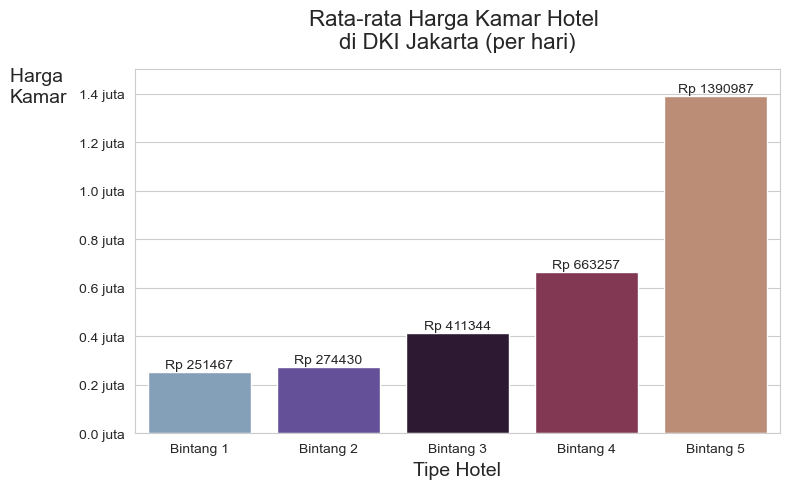

In [22]:
# set figure size
plt.figure(figsize=(8,5), dpi = 100) 

# set title
plt.title("Rata-rata Harga Kamar Hotel \ndi DKI Jakarta (per hari)", size = 16, pad = 15)

# bar plot
bplots = sns.barplot(x = 'jenis_hotel', y = 'harga',
                    data = hotels, ci = None, estimator = np.mean, 
                   palette = 'twilight')

# set y limit 
plt.ylim(0, 1500000)

# annotations
for p in bplots.patches:
    bplots.annotate('Rp {:.0f}'.format(p.get_height()), 
                  (p.get_x() + p.get_width()/2, p.get_height()),
                  ha = 'center', xytext = (0,3), 
                  textcoords = 'offset points')

# tick labels     
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: format(str(x/1000000))+' juta'))
plt.xticks()

# axes labels
plt.xlabel("Tipe Hotel", size = 14)
plt.ylabel("Harga \nKamar", size = 14, rotation = 0, 
          position = (.6, .90), ha = 'left', labelpad = 50)

plt.tight_layout();

# plt.savefig('Rata-rata Kamar Hotel di DKI JKT.png')

**Line Plot untuk Tren Pendapatan Tahun 2016**

In [23]:
# columns selection with criteria 

baris = hotels.tahun.isin(['2016'])
kolom = ['jenis_hotel', 'tahun', 'bulan', 'Tingkat Pendapatan']

df2016 = hotels.loc[baris, kolom]
df2016.head()

,jenis_hotel,tahun,bulan,Tingkat Pendapatan
0,Bintang 1,2016,1,2.128920e+06
1,Bintang 1,2016,2,4.642584e+06
2,Bintang 1,2016,3,5.386423e+05
3,Bintang 1,2016,4,2.847109e+06
4,Bintang 1,2016,5,2.285382e+07


In [24]:
# select max revenue

bintang1_2016 = df2016[df2016.jenis_hotel.isin(['Bintang 1'])]['Tingkat Pendapatan'].max()
bintang2_2016 = df2016[df2016.jenis_hotel.isin(['Bintang 2'])]['Tingkat Pendapatan'].max()
bintang3_2016 = df2016[df2016.jenis_hotel.isin(['Bintang 3'])]['Tingkat Pendapatan'].max()
bintang4_2016 = df2016[df2016.jenis_hotel.isin(['Bintang 4'])]['Tingkat Pendapatan'].max()
bintang5_2016 = df2016[df2016.jenis_hotel.isin(['Bintang 5'])]['Tingkat Pendapatan'].max()

In [25]:
# cek the max revenue in 2016 in each hotel category 

print(round(bintang1_2016, 0))
print(round(bintang2_2016, 0))
print(round(bintang3_2016,0))
print(round(bintang4_2016, 0))
print(round(bintang5_2016, 0))

22853824.0
19062457.0
56331093.0
153960521.0
452034609.0


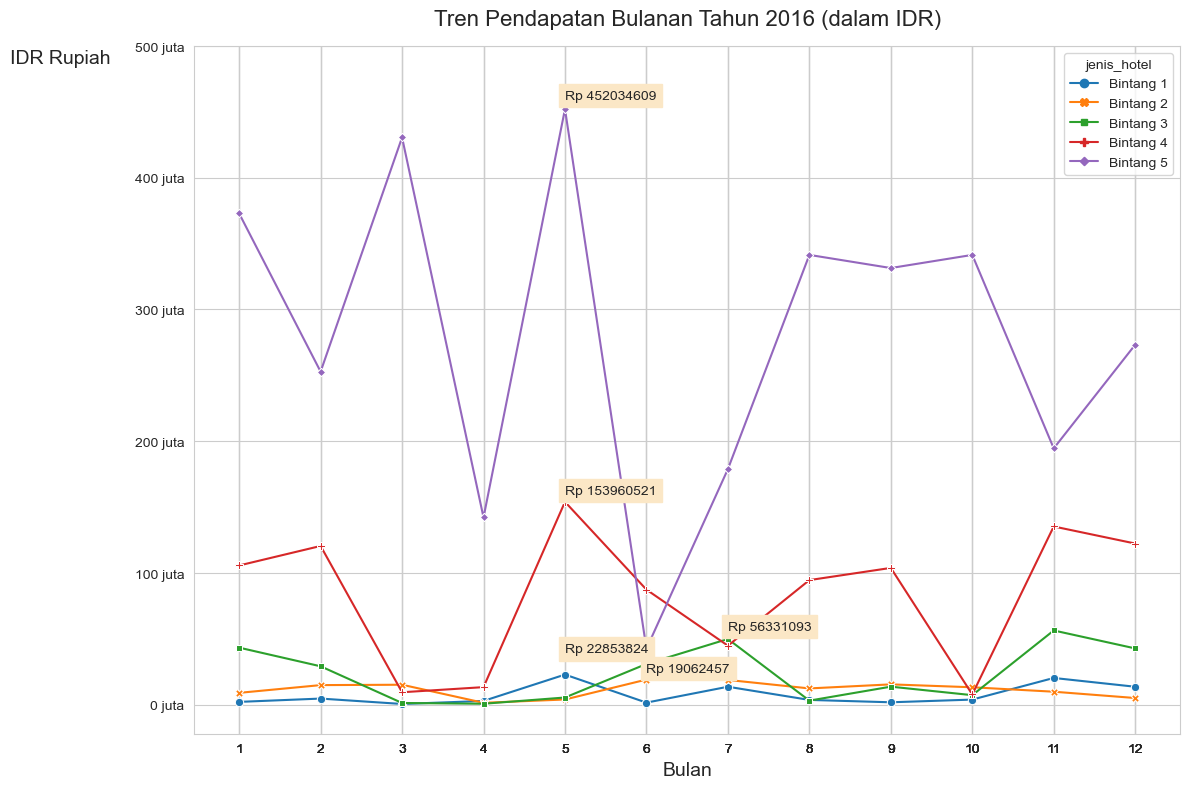

In [26]:
# set figure size
plt.figure(figsize = (12,8), dpi = 100)

# set title
plt.title('Tren Pendapatan Bulanan Tahun 2016 (dalam IDR)', size = 16, pad = 15)

# lineplot
sns.lineplot(x = 'bulan', y = 'Tingkat Pendapatan', data = df2016, 
            hue = 'jenis_hotel', style = 'jenis_hotel', 
            dashes = False, markers = True)

# set y limit 
plt.ylim(None, 500000000)

# annotations 
plt.text(5, 40000000, s = 'Rp {:.0f}'.format(bintang1_2016), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(6, 25000000, s = 'Rp {:.0f}'.format(bintang2_2016), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(7, 57000000, s = 'Rp {:.0f}'.format(bintang3_2016), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(5, 160000000, s = 'Rp {:.0f}'.format(bintang4_2016), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(5, 460000000, s = 'Rp {:.0f}'.format(bintang5_2016), fontsize = 10).set_backgroundcolor('#FBE7C6')

# set tick labels
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: format(str(int(x/1000000)) +' juta')))
plt.xticks(df2016.bulan)

# set axes labels
plt.xlabel('Bulan', size = 14)
plt.ylabel('IDR Rupiah', size = 14, rotation = 0, 
          position = (-.1, .97), ha = 'left',
          labelpad = 90)

plt.tight_layout();

# plt.savefig('Tren pendapatan bulanan 2016.png')

**Line Plot untuk Tren Pendapatan Tahun 2017**

In [27]:
# columns selection with criteria  

baris = hotels.tahun.isin(['2017'])
kolom = ['jenis_hotel', 'tahun', 'bulan', 'Tingkat Pendapatan']

df2017 = hotels.loc[baris, kolom]
df2017.head()

,jenis_hotel,tahun,bulan,Tingkat Pendapatan
60,Bintang 1,2017,1,6.207211e+06
61,Bintang 1,2017,2,8.490029e+06
62,Bintang 1,2017,3,8.490029e+06
63,Bintang 1,2017,4,1.005466e+07
64,Bintang 1,2017,5,1.210663e+07


In [28]:
# select max revenue

bintang1_2017 = df2017[df2017.jenis_hotel.isin(['Bintang 1'])]['Tingkat Pendapatan'].max()
bintang2_2017 = df2017[df2017.jenis_hotel.isin(['Bintang 2'])]['Tingkat Pendapatan'].max()
bintang3_2017 = df2017[df2017.jenis_hotel.isin(['Bintang 3'])]['Tingkat Pendapatan'].max()
bintang4_2017 = df2017[df2017.jenis_hotel.isin(['Bintang 4'])]['Tingkat Pendapatan'].max()
bintang5_2017 = df2017[df2017.jenis_hotel.isin(['Bintang 5'])]['Tingkat Pendapatan'].max()

In [29]:
# cek the max revenue in 2017 in each hotel category 

print(round(bintang1_2017, 0))
print(round(bintang2_2017, 0))
print(round(bintang3_2017,0))
print(round(bintang4_2017, 0))
print(round(bintang5_2017, 0))

13876452.0
26088414.0
55205656.0
181717826.0
504474819.0


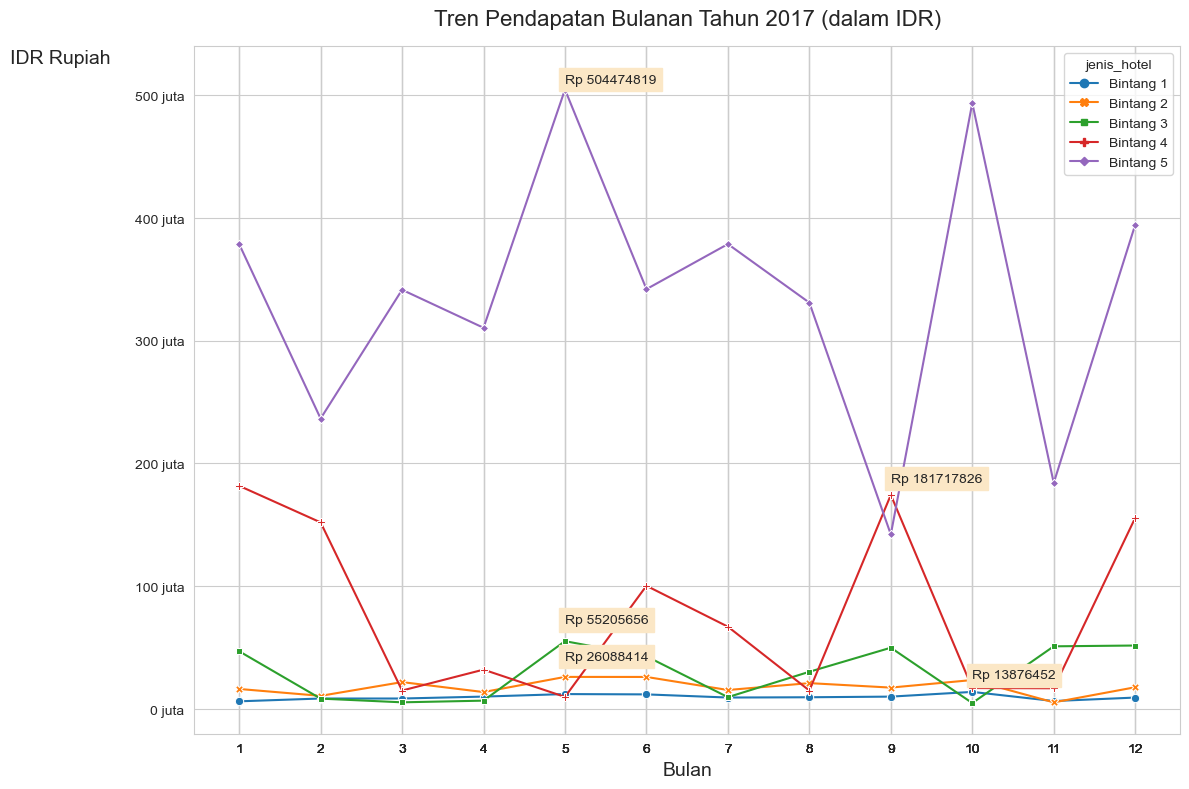

In [30]:
# set figure size
plt.figure(figsize = (12,8), dpi = 100)

# set title
plt.title('Tren Pendapatan Bulanan Tahun 2017 (dalam IDR)', size = 16, pad = 15)

# line plot
sns.lineplot(x = 'bulan', y = 'Tingkat Pendapatan', data = df2017, 
            hue = 'jenis_hotel', style = 'jenis_hotel', 
            dashes = False, markers = True)

# set y limit
plt.ylim(None, 540000000)

# annotations 
plt.text(10, 25000000, s = 'Rp {:.0f}'.format(bintang1_2017), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(5, 40000000, s = 'Rp {:.0f}'.format(bintang2_2017), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(5, 70000000, s = 'Rp {:.0f}'.format(bintang3_2017), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(9, 185000000, s = 'Rp {:.0f}'.format(bintang4_2017), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(5, 510000000, s = 'Rp {:.0f}'.format(bintang5_2017), fontsize = 10).set_backgroundcolor('#FBE7C6')

# set tick labels
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: format(str(int(x/1000000)) +' juta')))                
plt.xticks(df2017.bulan)

# set axes labels
plt.xlabel('Bulan', size = 14)
plt.ylabel('IDR Rupiah', size = 14, rotation = 0, 
          position = (-.1, .97), ha = 'left',
          labelpad = 90)

plt.tight_layout();

# plt.savefig('Tren pendapatan bulanan 2017.png')

**Line Plot untuk Tren Pendapatan Tahun 2018**

In [31]:
# columns selection with criteria

baris = hotels.tahun.isin(['2018'])
kolom = ['jenis_hotel', 'tahun', 'bulan', 'Tingkat Pendapatan']

df2018 = hotels.loc[baris, kolom]
df2018.head()

,jenis_hotel,tahun,bulan,Tingkat Pendapatan
120,Bintang 1,2018,1,312925.5348
121,Bintang 1,2018,2,223151.8158
122,Bintang 1,2018,3,471953.2656
123,Bintang 1,2018,4,256496.3400
124,Bintang 1,2018,5,256496.3400


In [32]:
# select max revenue

bintang1_2018 = df2018[df2018.jenis_hotel.isin(['Bintang 1'])]['Tingkat Pendapatan'].max()
bintang2_2018 = df2018[df2018.jenis_hotel.isin(['Bintang 2'])]['Tingkat Pendapatan'].max()
bintang3_2018 = df2018[df2018.jenis_hotel.isin(['Bintang 3'])]['Tingkat Pendapatan'].max()
bintang4_2018 = df2018[df2018.jenis_hotel.isin(['Bintang 4'])]['Tingkat Pendapatan'].max()
bintang5_2018 = df2018[df2018.jenis_hotel.isin(['Bintang 5'])]['Tingkat Pendapatan'].max()

In [33]:
# cek the max revenue in 2018 in each hotel category 

print(round(bintang1_2018, 0))
print(round(bintang2_2018, 0))
print(round(bintang3_2018,0))
print(round(bintang4_2018, 0))
print(round(bintang5_2018, 0))

810528.0
621419.0
1824393.0
4293130.0
13057612.0


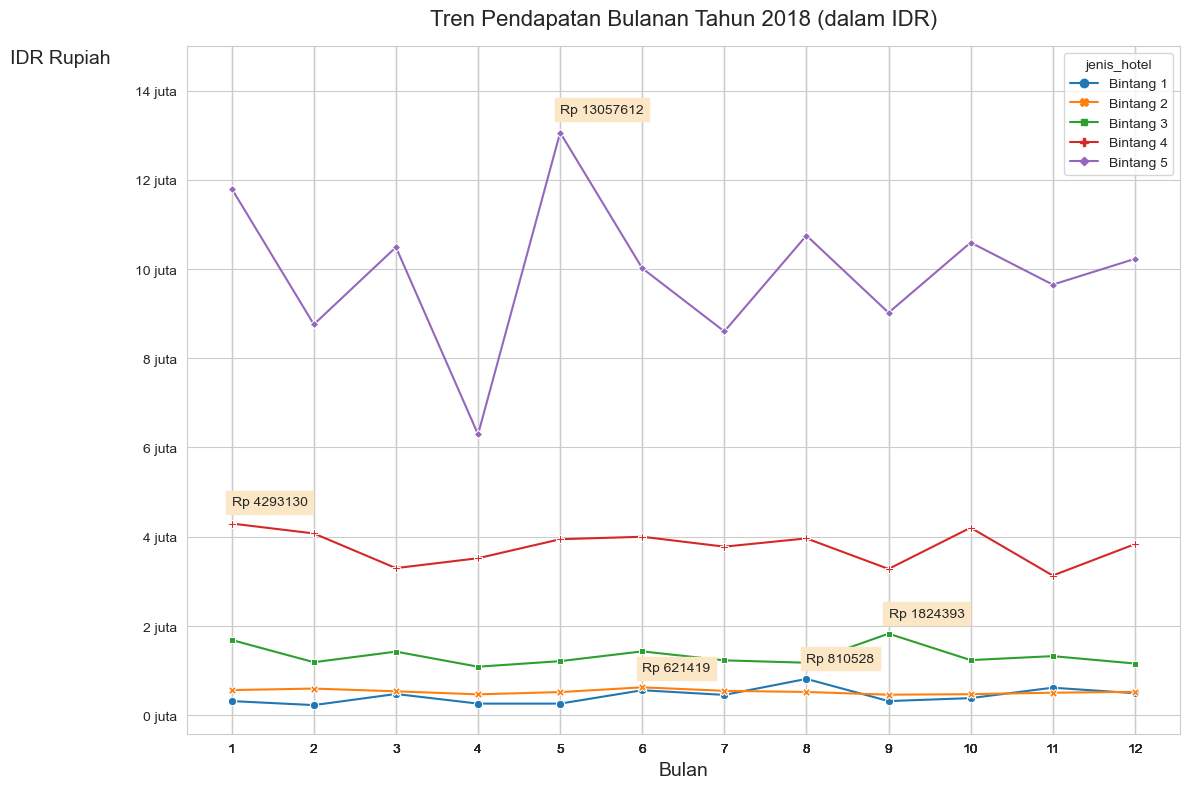

In [34]:
# set figure size
plt.figure(figsize = (12,8), dpi = 100)

# set title
plt.title('Tren Pendapatan Bulanan Tahun 2018 (dalam IDR)', size = 16, pad = 15)

# line plot
sns.lineplot(x = 'bulan', y = 'Tingkat Pendapatan', data = df2018, 
            hue = 'jenis_hotel', style = 'jenis_hotel', 
            dashes = False, markers = True)

# set y limit 
plt.ylim(None, 15000000)

# annotations 
plt.text(8, 1200000, s = 'Rp {:.0f}'.format(bintang1_2018), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(6, 980000, s = 'Rp {:.0f}'.format(bintang2_2018), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(9, 2200000, s = 'Rp {:.0f}'.format(bintang3_2018), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(1, 4700000, s = 'Rp {:.0f}'.format(bintang4_2018), fontsize = 10).set_backgroundcolor('#FBE7C6')
plt.text(5, 13500000, s = 'Rp {:.0f}'.format(bintang5_2018), fontsize = 10).set_backgroundcolor('#FBE7C6')

# set tick labels
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x,p: format(str(int(x/1000000)) +' juta')))                       
plt.xticks(df2018.bulan)

# set axes labels
plt.xlabel('Bulan', size = 14)
plt.ylabel('IDR Rupiah', size = 14, rotation = 0, 
          position = (-.1, .97), ha = 'left',
          labelpad = 90)

plt.tight_layout();

# plt.savefig('Tren pendapatan bulanan 2018.png')

## Visualisasi pendapatan tahunan 

In [35]:
hotelspivotable = hotels.pivot_table(values = 'Tingkat Pendapatan', index = 'tahun', 
                                     columns = 'jenis_hotel', aggfunc = 'mean')

hotelspivotable

jenis_hotel,Bintang 1,Bintang 2,Bintang 3,Bintang 4,Bintang 5
tahun,,,,,
2016,7.617941e+06,1.150932e+07,2.364405e+07,8.322565e+07,2.794626e+08
2017,9.633575e+06,1.792179e+07,3.022885e+07,7.804429e+07,3.364039e+08
2018,4.279214e+05,5.244042e+05,1.328312e+06,3.773451e+06,9.937420e+06


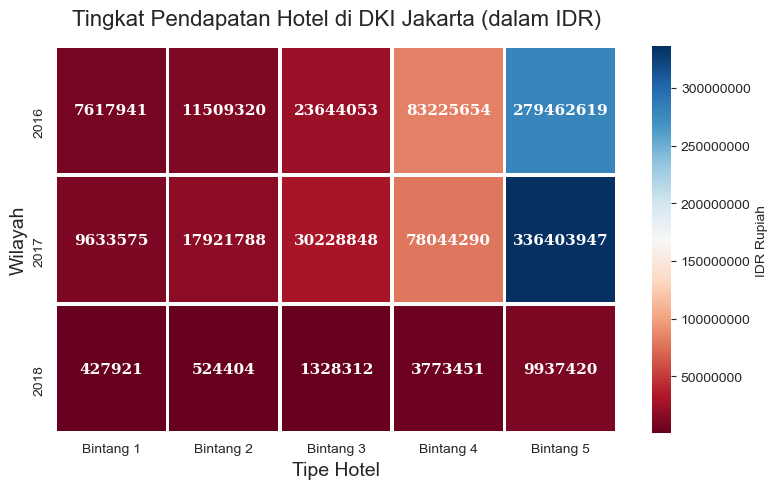

In [36]:
# set figure size
plt.figure(figsize = (8,5), dpi = 100)

# set title
plt.title('Tingkat Pendapatan Hotel di DKI Jakarta (dalam IDR)', size = 16, pad = 15)

# heatmap
sns.heatmap(hotelspivotable, 
            cmap = 'RdBu',
            annot = True,
            linewidth = 2,
            fmt = '.0f', annot_kws = {
                'fontsize': 11, 
                'fontweight': 'bold', 
                'fontfamily': 'serif'
            }, cbar_kws = {
                'format': '%d', 
                'label': 'IDR Rupiah'
            })


# set axes lavels
plt.xlabel('Tipe Hotel', size = 14)
plt.ylabel('Wilayah', size = 14)

plt.tight_layout();

# plt.savefig('Heatmap rata-rata pendapatan hotel DKI Jakarta.png')